In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import log_loss

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving diabetes.csv to diabetes (1).csv


In [ ]:
pd.read_csv("diabetes.csv")

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [ ]:
df = pd.read_csv("diabetes.csv")

In [ ]:
print(df.shape)
print(df.columns)
print(df.isnull().sum())
print(df.info())
print(df.dtypes)
print(df.describe())
df["Outcome"].value_counts()

(768, 9)
Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')
Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6 

0    500
1    268
Name: Outcome, dtype: int64

                          Pregnancies   Glucose  BloodPressure  SkinThickness  \
Pregnancies                  1.000000  0.129459       0.141282      -0.081672   
Glucose                      0.129459  1.000000       0.152590       0.057328   
BloodPressure                0.141282  0.152590       1.000000       0.207371   
SkinThickness               -0.081672  0.057328       0.207371       1.000000   
Insulin                     -0.073535  0.331357       0.088933       0.436783   
BMI                          0.017683  0.221071       0.281805       0.392573   
DiabetesPedigreeFunction    -0.033523  0.137337       0.041265       0.183928   
Age                          0.544341  0.263514       0.239528      -0.113970   
Outcome                      0.221898  0.466581       0.065068       0.074752   

                           Insulin       BMI  DiabetesPedigreeFunction  \
Pregnancies              -0.073535  0.017683                 -0.033523   
Glucose                   0.331357  0.221

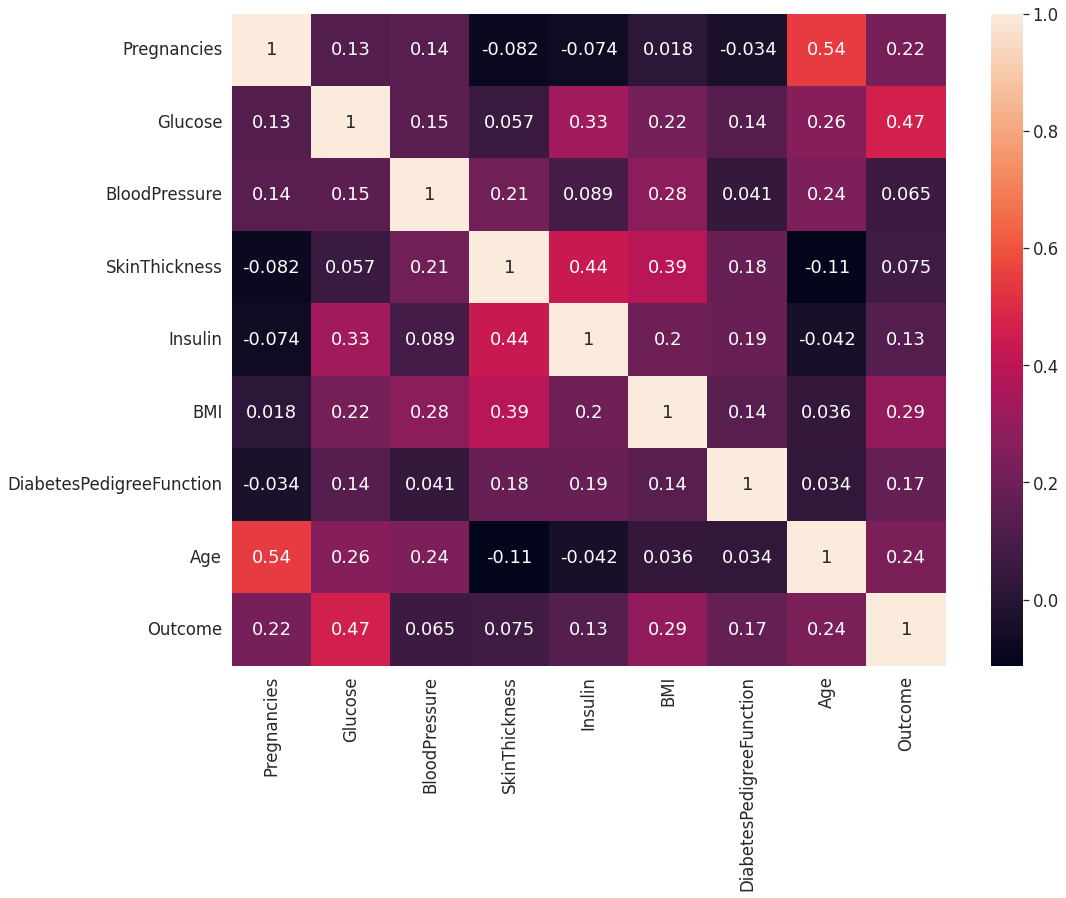

In [ ]:
print(df.corr())
fig, ax = plt.subplots(figsize=(16, 12))
sns.heatmap(df.corr(), annot=True)
plt.show()

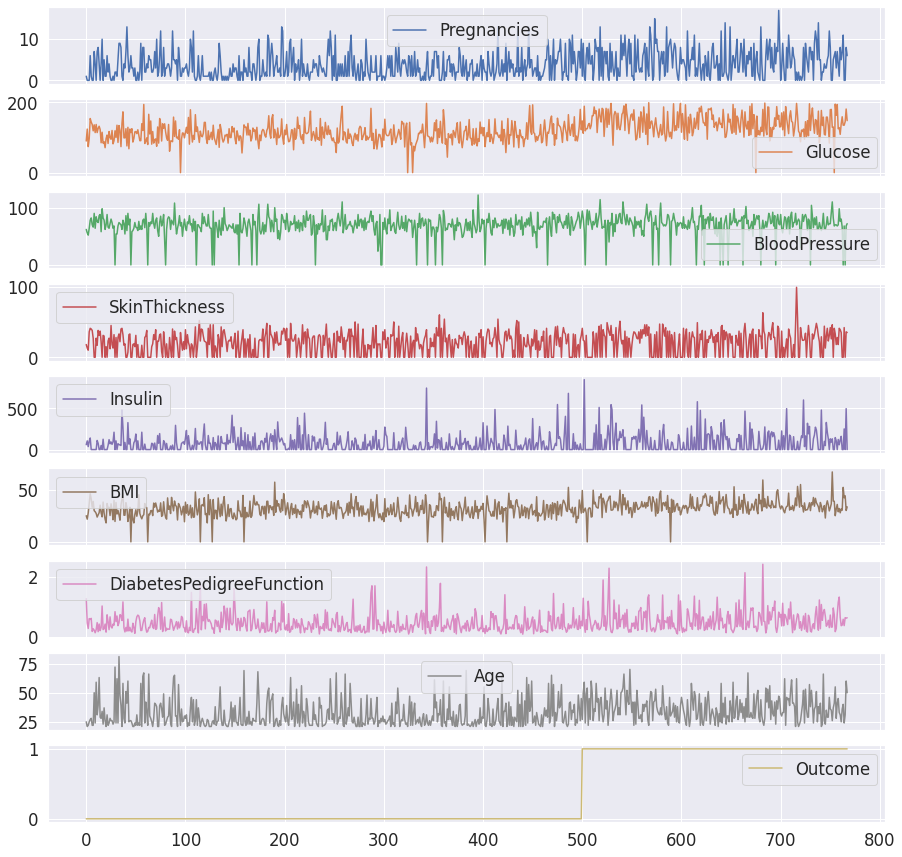

In [ ]:
df.sort_values(by=["Outcome"],inplace=True,ignore_index=True)
df.plot(figsize = (15,15), subplots = True)
plt.show()

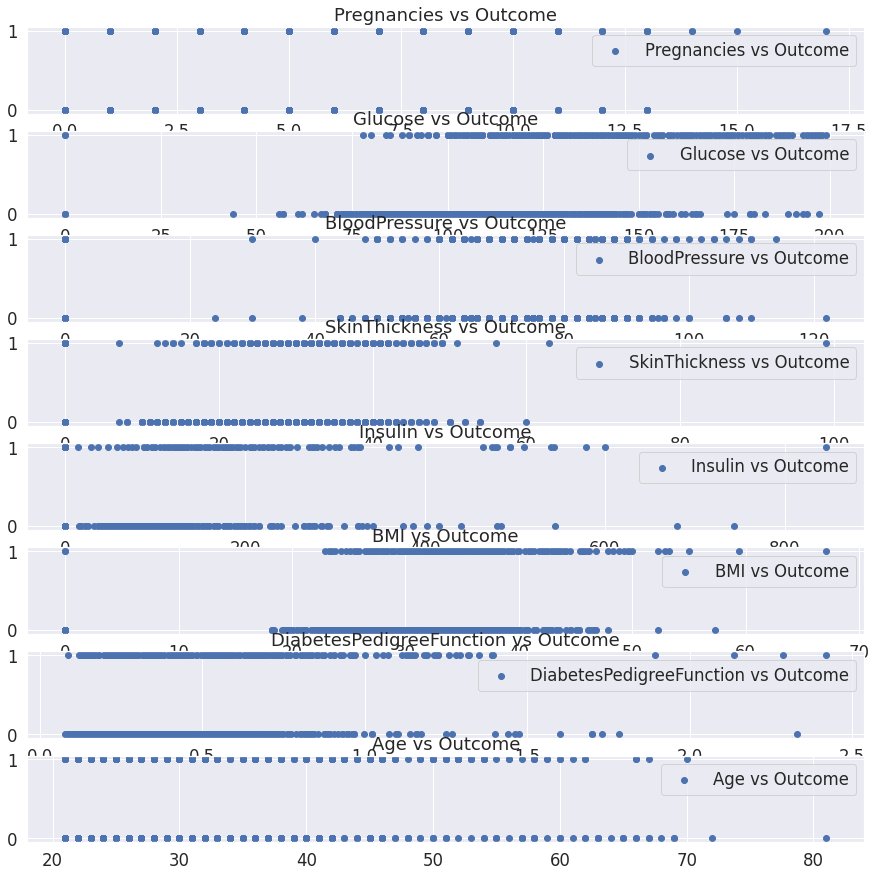

In [ ]:
fig, ax = plt.subplots(8, 1,figsize=(15,15))
continuous_variables = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']
for i,x in enumerate(continuous_variables):
    ax[i].scatter(df[x],df['Outcome'],label=("{} vs Outcome".format(x)))
    ax[i].set_title("{} vs Outcome".format(x))
    ax[i].legend()
plt.show()

In [ ]:
con_vara = [i for i in df.columns if df[i].dtype != "object"]
con_vara.pop()
print(con_vara)

['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']


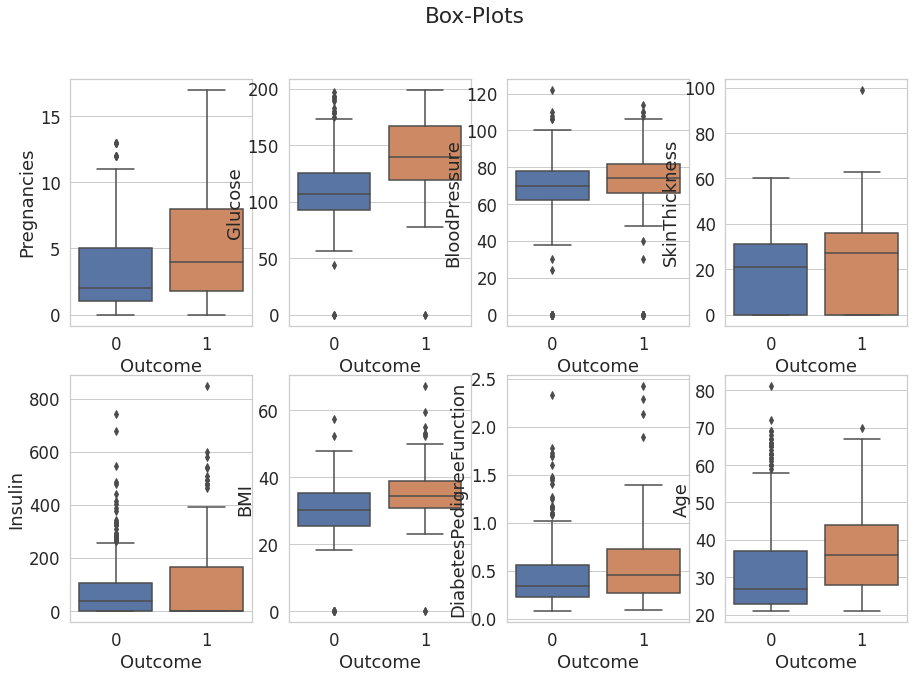

In [ ]:
sns.set_style("whitegrid")
fig,ax = plt.subplots(2,4,figsize=(15,10))
fig.suptitle('Box-Plots')
j=k=0
for i,x in enumerate(con_vara):
    sns.boxplot(x=df.Outcome, y=df[x] ,ax=ax[k,j])
    if(i==3):
        k=1;j=0
    else:
        j=j+1

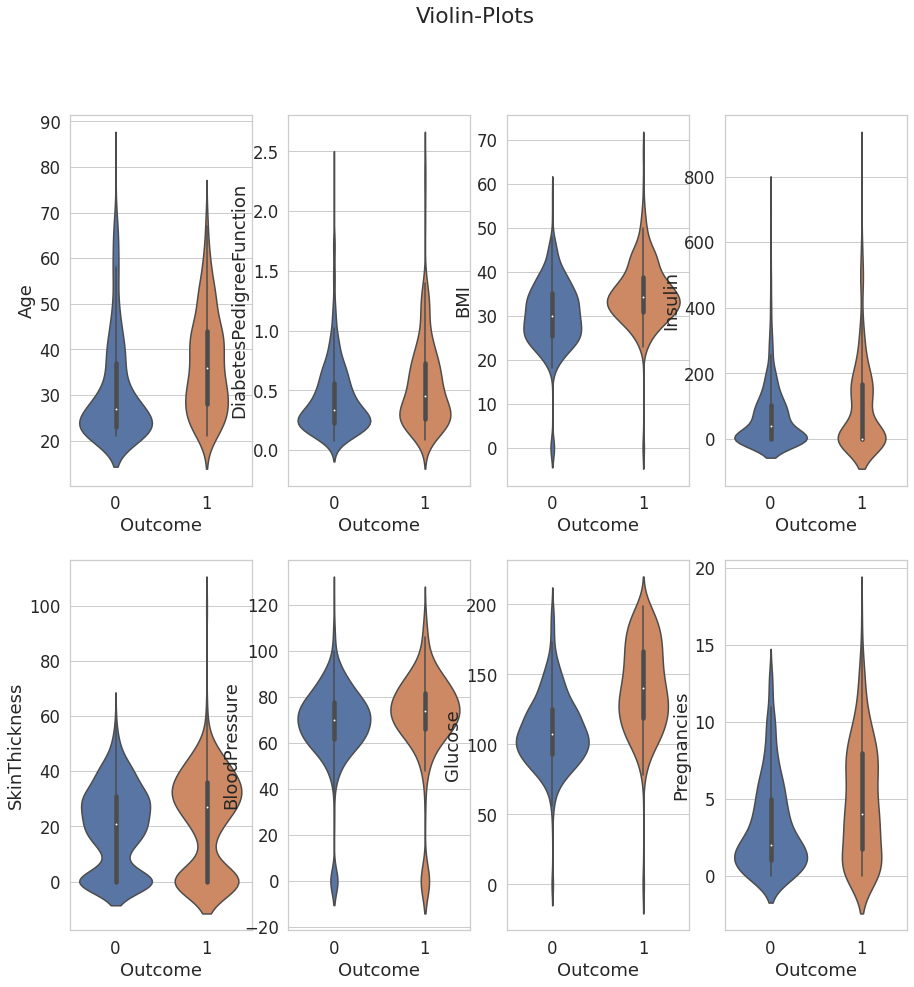

In [ ]:
sns.set_style("whitegrid")
fig, axes = plt.subplots(2, 4, figsize=(15, 15))
fig.suptitle('Violin-Plots')
continuous_variables = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']
for i in range(0,2):
    for j in range(0,4):
        name =continuous_variables.pop()
        sns.violinplot(ax=axes[i, j], x='Outcome',y=name, data=df)
plt.show()

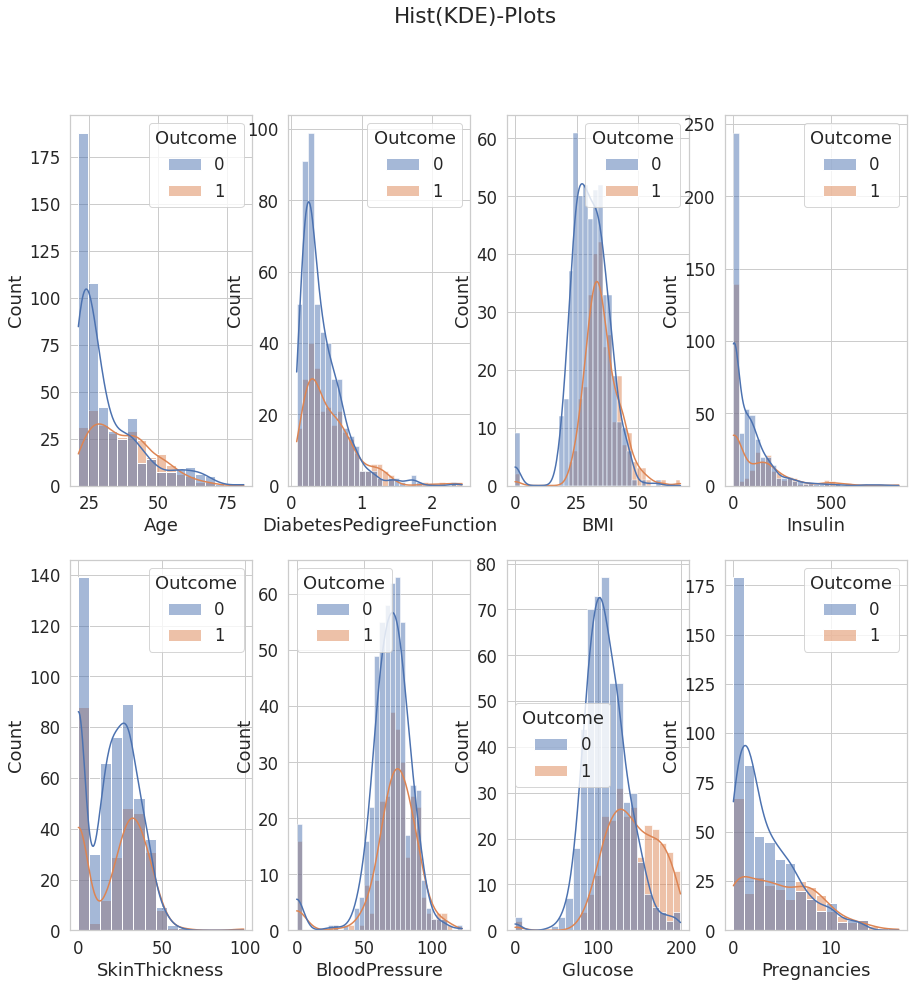

In [ ]:
sns.set_style("whitegrid")
fig, axes = plt.subplots(2, 4, figsize=(15, 15))
fig.suptitle('Hist(KDE)-Plots')
continuous_variables = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']
for i in range(0,2):
    for j in range(0,4):
        name =continuous_variables.pop()
        sns.histplot(ax=axes[i, j], hue='Outcome',x=name, data=df,kde=True)
plt.show()

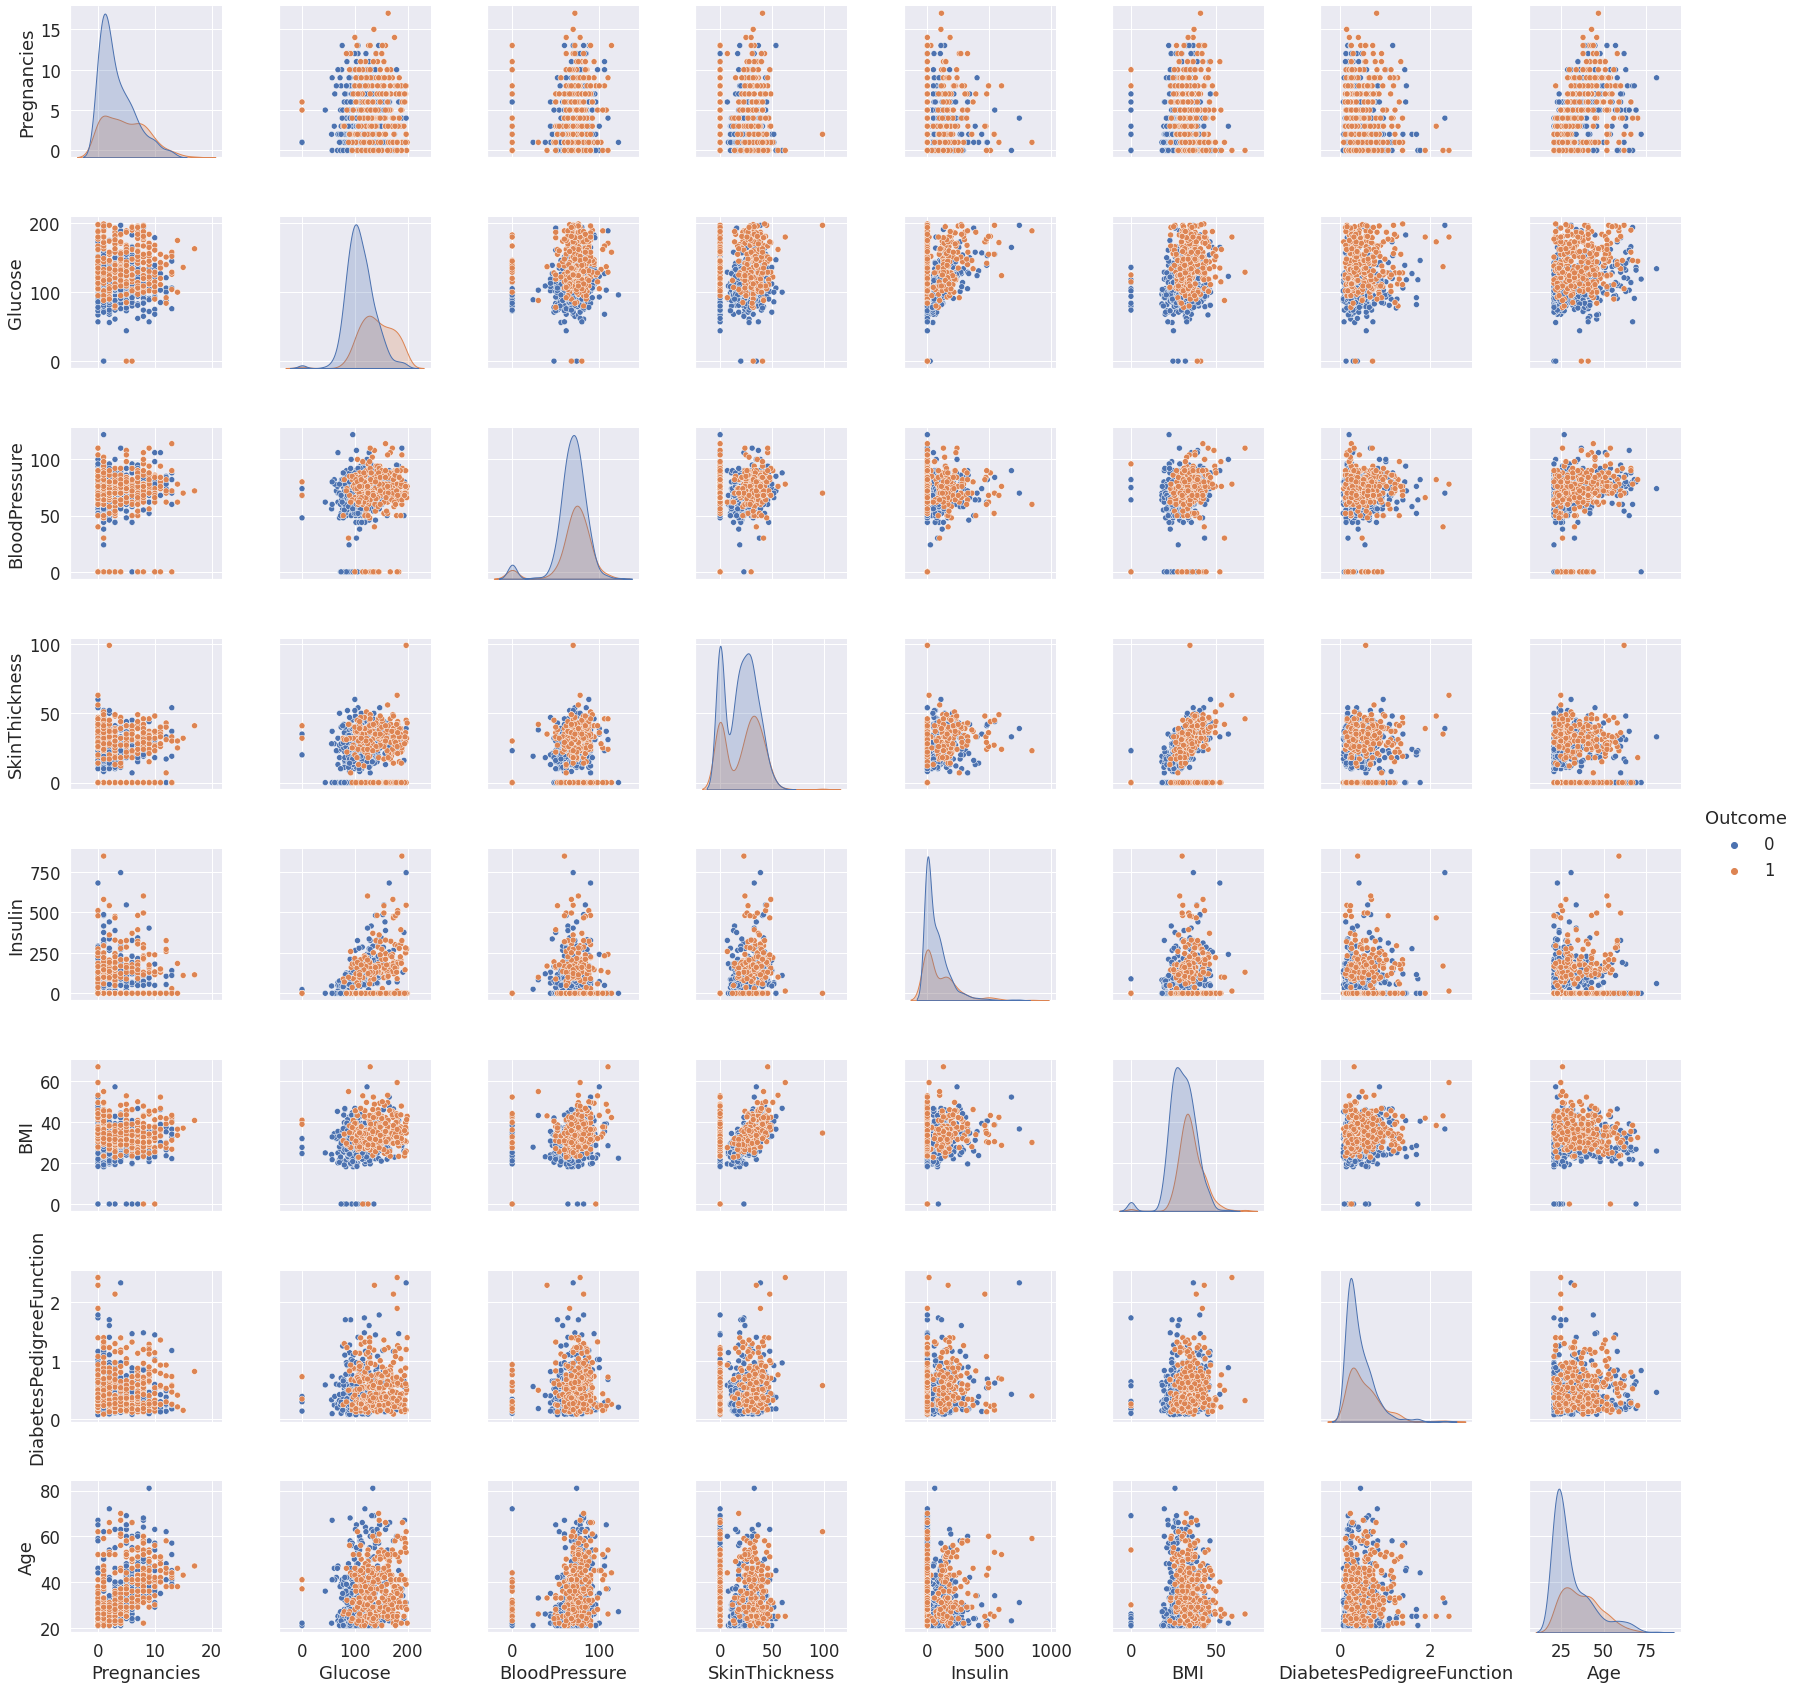

In [ ]:
sns.set(font_scale=1.5)
sns.pairplot(data = df, kind = "scatter", hue = "Outcome", aspect =1, height = 3)
plt.show()

                          Pregnancies   Glucose  BloodPressure  SkinThickness  \
Pregnancies                  1.000000  0.129459       0.141282      -0.081672   
Glucose                      0.129459  1.000000       0.152590       0.057328   
BloodPressure                0.141282  0.152590       1.000000       0.207371   
SkinThickness               -0.081672  0.057328       0.207371       1.000000   
Insulin                     -0.073535  0.331357       0.088933       0.436783   
BMI                          0.017683  0.221071       0.281805       0.392573   
DiabetesPedigreeFunction    -0.033523  0.137337       0.041265       0.183928   
Age                          0.544341  0.263514       0.239528      -0.113970   
Outcome                      0.221898  0.466581       0.065068       0.074752   

                           Insulin       BMI  DiabetesPedigreeFunction  \
Pregnancies              -0.073535  0.017683                 -0.033523   
Glucose                   0.331357  0.221

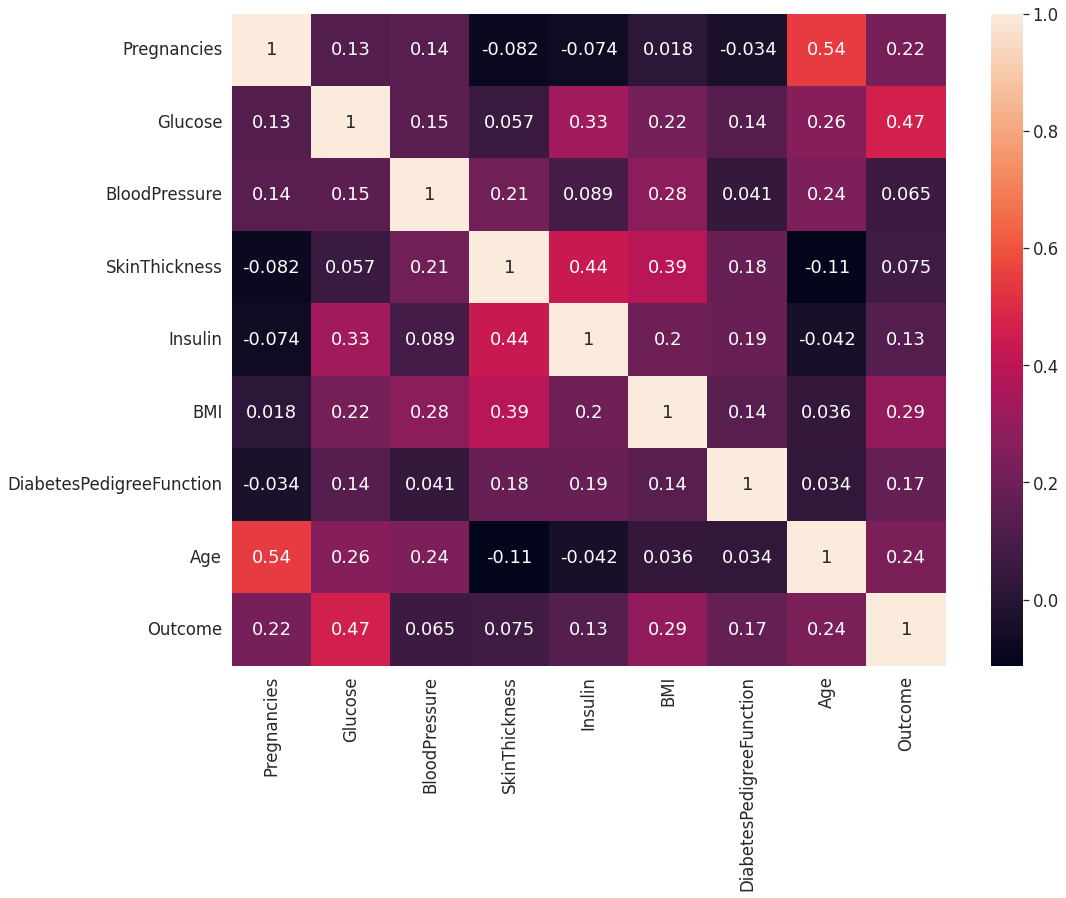

In [ ]:
print(df.corr())
fig, ax = plt.subplots(figsize=(16, 12))
sns.heatmap(df.corr(), annot=True)
plt.show()

-6.5 13.5
37.5 201.5
35.0 107.0
-49.5 82.5
-198.0 330.0
13.699999999999994 49.70000000000001
-0.30737499999999995 1.165625
-0.75 65.25


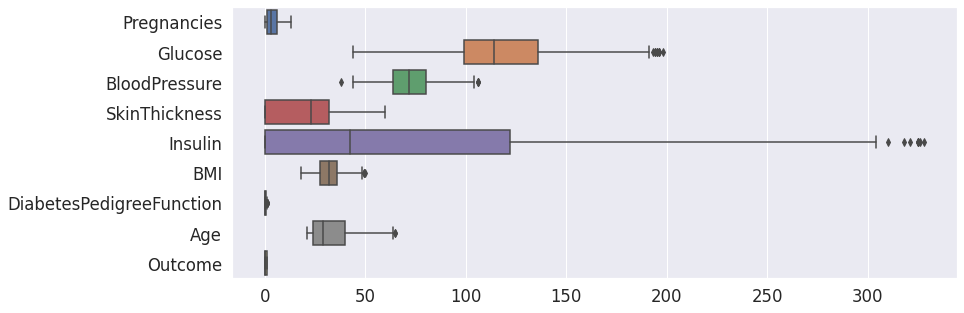

In [ ]:
#Eliminating Outliers with IQR Method
continuous_variables = ["Pregnancies", "Glucose", "BloodPressure", "SkinThickness", "Insulin",
                        "BMI", "DiabetesPedigreeFunction", "Age"]
for i in range(0,8):
    Q1 = df[continuous_variables[i]].quantile(0.25)
    Q3 = df[continuous_variables[i]].quantile(0.75)
    IQR = Q3 - Q1
    lower_limit = Q1 - 1.5*IQR
    upper_limit = Q3 + 1.5*IQR
    print(lower_limit, upper_limit)
    df = df[(df[continuous_variables[i]]>lower_limit)&(df[continuous_variables[i]]<upper_limit)]

plt.figure(figsize=(13,5))
sns.boxplot(data=df,orient='h')
plt.show()

In [ ]:
continuous_variables = ["Pregnancies", "Glucose", "BloodPressure", "SkinThickness", "Insulin",
                        "BMI", "DiabetesPedigreeFunction", "Age"]
for i in range(0,8):
    Q1 = df[continuous_variables[i]].quantile(0.25)
    Q3 = df[continuous_variables[i]].quantile(0.75)
    IQR = Q3 - Q1
    lower_limit = Q1 - 1.5*IQR
    upper_limit = Q3 + 1.5*IQR
    print(lower_limit, upper_limit)
    df = df[(df[continuous_variables[i]]>lower_limit)&(df[continuous_variables[i]]<upper_limit)]

-6.5 13.5
43.5 191.5
40.0 104.0
-48.0 80.0
-180.0 300.0
14.350000000000009 48.749999999999986
-0.27874999999999994 1.1012499999999998
1.5 61.5


In [ ]:
from sklearn.utils import resample
df_majority = df[(df["Outcome"]==0)]
df_minority = df[(df["Outcome"]==1)]
df_minority_upsampled = resample(df_minority,replace=True,n_samples=500,random_state=42)
df = pd.concat([df_minority_upsampled,df_majority])
df["Outcome"].value_counts()

1    500
0    420
Name: Outcome, dtype: int64

In [ ]:
scaler = StandardScaler()
scaler.fit_transform(df)

array([[ 1.38041103,  0.98674912,  0.51181107, ...,  1.94369194,
        -0.02457441,  0.91651514],
       [-0.63679955, -0.74399364,  1.26549845, ..., -1.34611048,
        -1.01184347,  0.91651514],
       [ 1.38041103,  1.60981651,  0.13496739, ..., -0.16075086,
         0.96269464,  0.91651514],
       ...,
       [ 0.80406515,  0.32906687,  1.07707661, ...,  1.09762004,
         0.37033321, -1.09108945],
       [-0.34862661,  1.95596506, -0.80714183, ..., -0.72766198,
        -0.71566275, -1.09108945],
       [ 1.66858397, -0.05169653,  0.51181107, ...,  0.30738029,
         1.16014845, -1.09108945]])

In [ ]:
X=df.drop(["Outcome"],axis='columns')
Y=df["Outcome"]
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.30)
print("train data length:",len(X_train))
print("test data length:",len(X_test))

train data length: 644
test data length: 276


# **Logistic Regression Model**

In [ ]:
lg_model = LogisticRegression(C=1.0)
lg_model.fit(X_train,Y_train)
print("train score",lg_model.score(X_train,Y_train))
print("test score",lg_model.score(X_test,Y_test))
print("log-loss:",log_loss(Y_test,lg_model.predict_proba(X_test)))

train score 0.7391304347826086
test score 0.7391304347826086
log-loss: 0.5107335724445231


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


[[ 91  33]
 [ 39 113]]
{'C': 1.0, 'class_weight': None, 'dual': False, 'fit_intercept': True, 'intercept_scaling': 1, 'l1_ratio': None, 'max_iter': 100, 'multi_class': 'auto', 'n_jobs': None, 'penalty': 'l2', 'random_state': None, 'solver': 'lbfgs', 'tol': 0.0001, 'verbose': 0, 'warm_start': False}


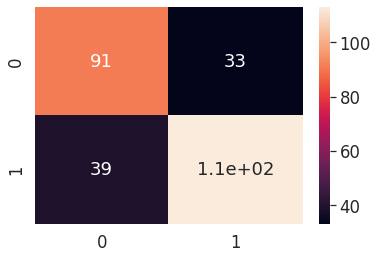

              precision    recall  f1-score   support

           0       0.70      0.73      0.72       124
           1       0.77      0.74      0.76       152

    accuracy                           0.74       276
   macro avg       0.74      0.74      0.74       276
weighted avg       0.74      0.74      0.74       276



In [ ]:
print(confusion_matrix(Y_test,lg_model.predict(X_test)))
print(lg_model.get_params())
sns.heatmap(confusion_matrix(Y_test,lg_model.predict(X_test)), annot=True)
plt.show()
print(classification_report(Y_test, lg_model.predict(X_test)))

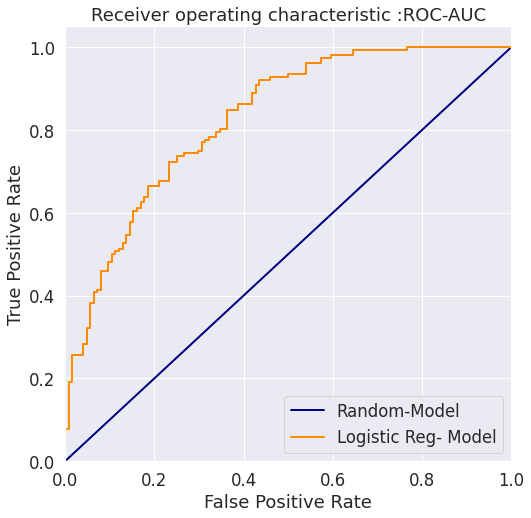

Computed Area Under the Curve (AUC) 0.8265598471986417


In [ ]:
from sklearn.metrics import roc_curve,auc
fpr,tpr, thresholds = roc_curve(Y_test,lg_model.predict_proba(X_test)[:,1])
plt.figure(figsize=(8,8))
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.plot([0,1],[0,1],color="navy",lw=2,label="Random-Model")
plt.plot(fpr,tpr,color="darkorange",lw=2, label="Logistic Reg- Model")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operating characteristic :ROC-AUC")
plt.legend()
plt.show()
print("Computed Area Under the Curve (AUC)",auc(fpr, tpr))

In [ ]:
# Grid search cross validation
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
grid={"C":[0.001,0.01, 0.1,1,5,10,15], "penalty":["l1","l2"]}
logreg=LogisticRegression(solver="liblinear")
logreg_cv=GridSearchCV(logreg,grid,cv=5)
logreg_cv.fit(X_train,Y_train)

print("tuned hpyerparameters :(best parameters) ",logreg_cv.best_params_)
print("accuracy :",logreg_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'C': 5, 'penalty': 'l2'}
accuracy : 0.7671632751937985


In [ ]:
lg_model = LogisticRegression(C=1.0,penalty='l1',solver="liblinear")
lg_model.fit(X_train,Y_train)
print("train score",lg_model.score(X_train,Y_train))
print("test score",lg_model.score(X_test,Y_test))
print("log-loss:",log_loss(Y_test,lg_model.predict_proba(X_test)))

train score 0.7562111801242236
test score 0.7210144927536232
log-loss: 0.5083685829785721


[[ 90  34]
 [ 43 109]]
{'C': 1.0, 'class_weight': None, 'dual': False, 'fit_intercept': True, 'intercept_scaling': 1, 'l1_ratio': None, 'max_iter': 100, 'multi_class': 'auto', 'n_jobs': None, 'penalty': 'l1', 'random_state': None, 'solver': 'liblinear', 'tol': 0.0001, 'verbose': 0, 'warm_start': False}


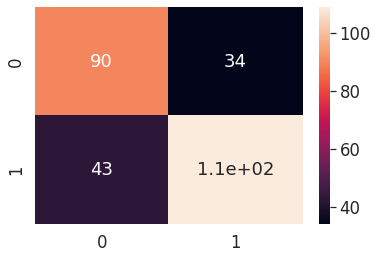

              precision    recall  f1-score   support

           0       0.68      0.73      0.70       124
           1       0.76      0.72      0.74       152

    accuracy                           0.72       276
   macro avg       0.72      0.72      0.72       276
weighted avg       0.72      0.72      0.72       276



In [ ]:
print(confusion_matrix(Y_test,lg_model.predict(X_test)))
print(lg_model.get_params())
sns.heatmap(confusion_matrix(Y_test,lg_model.predict(X_test)), annot=True)
plt.show()
print(classification_report(Y_test, lg_model.predict(X_test)))


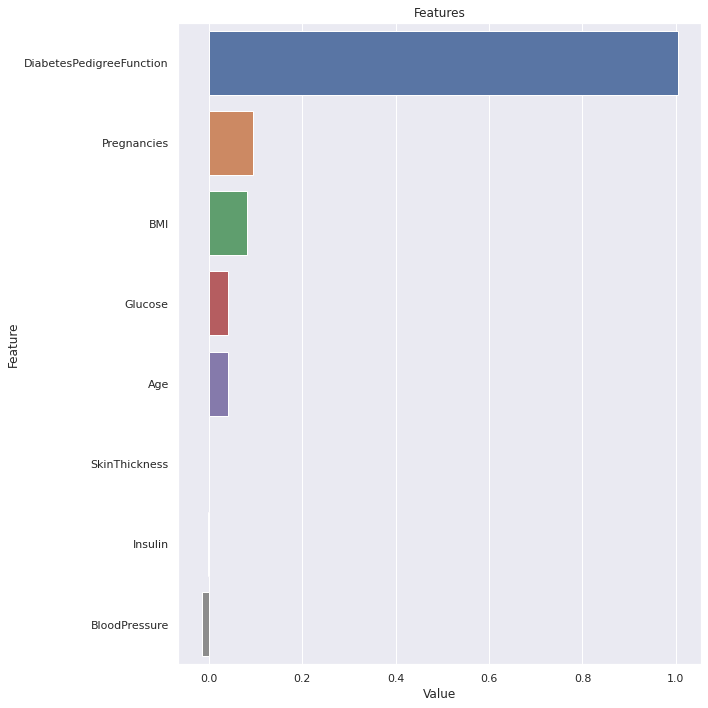

In [ ]:
feature_imp = pd.DataFrame({'Value': lg_model.coef_[0], 'Feature': X.columns})
plt.figure(figsize=(10, 10))
sns.set(font_scale=1)
sns.barplot(x="Value", y="Feature", data=feature_imp.sort_values(by="Value",
                                                                     ascending=False)[0:8])
plt.title('Features')
plt.tight_layout()
plt.show()

In [ ]:
import statsmodels.api as sm
# building the model and fitting the data
log_reg = sm.Logit(Y_train, X_train).fit()
# printing the summary table
print(log_reg.summary())

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Optimization terminated successfully.
         Current function value: 0.581971
         Iterations 5
                           Logit Regression Results                           
Dep. Variable:                Outcome   No. Observations:                  644
Model:                          Logit   Df Residuals:                      636
Method:                           MLE   Df Model:                            7
Date:                Sat, 23 Jul 2022   Pseudo R-squ.:                  0.1564
Time:                        18:20:31   Log-Likelihood:                -374.79
converged:                       True   LL-Null:                       -444.29
Covariance Type:            nonrobust   LLR p-value:                 8.265e-27
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Pregnancies                  0.1123      0.031      3.591      0.000       0.051

# **ML - DecisionTree Classifier**

In [ ]:
X=df.drop('Outcome',axis='columns')
Y=df["Outcome"]
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.30)
print("train data length:",len(X_train))
print("test data length:",len(X_test))

train data length: 644
test data length: 276


In [ ]:
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train,Y_train)
print("Train Score:",dt_model.score(X_train,Y_train))
print("Test Score:",dt_model.score(X_test,Y_test))

Train Score: 1.0
Test Score: 0.8623188405797102


[[ 97  32]
 [  6 141]]


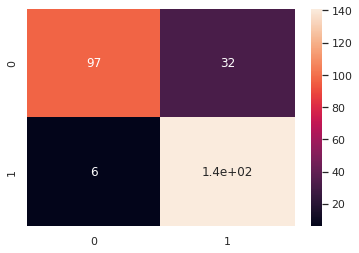

              precision    recall  f1-score   support

           0       0.94      0.75      0.84       129
           1       0.82      0.96      0.88       147

    accuracy                           0.86       276
   macro avg       0.88      0.86      0.86       276
weighted avg       0.87      0.86      0.86       276



In [ ]:
print(confusion_matrix(Y_test,dt_model.predict(X_test)))
sns.heatmap(confusion_matrix(Y_test,dt_model.predict(X_test)), annot=True)
plt.show()
print(classification_report(Y_test, dt_model.predict(X_test)))

In [ ]:
print("feature importance",dt_model.feature_importances_)
print("tree depth:",dt_model.get_depth())
print("num of leaves",dt_model.get_n_leaves())
print(dt_model.get_params())

feature importance [0.08336298 0.29790829 0.09894324 0.06510486 0.05865233 0.09353771
 0.19100386 0.11148672]
tree depth: 12
num of leaves 88
{'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'random_state': None, 'splitter': 'best'}


In [ ]:
from sklearn.model_selection import GridSearchCV
tree_para = {'criterion':['gini','entropy'],'max_depth':[4,5,6,7,8,9,10,11,12,15,20,30,40,50,70,90,120,150],'min_samples_split': [2, 3, 4]}
clf = GridSearchCV(DecisionTreeClassifier(), tree_para, cv=5)
clf.fit(X_train,Y_train)
print("tuned hpyerparameters :(best parameters) :",clf.best_params_)
print(clf.best_estimator_)

tuned hpyerparameters :(best parameters) : {'criterion': 'entropy', 'max_depth': 90, 'min_samples_split': 2}
DecisionTreeClassifier(criterion='entropy', max_depth=90)


In [ ]:
dt_model = DecisionTreeClassifier(criterion="gini",max_depth=120,min_samples_split=3)
dt_model.fit(X_train,Y_train)

DecisionTreeClassifier(max_depth=120, min_samples_split=3)

[[100  29]
 [  7 140]]


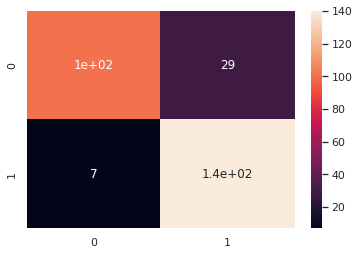

              precision    recall  f1-score   support

           0       0.93      0.78      0.85       129
           1       0.83      0.95      0.89       147

    accuracy                           0.87       276
   macro avg       0.88      0.86      0.87       276
weighted avg       0.88      0.87      0.87       276



In [ ]:
print(confusion_matrix(Y_test,dt_model.predict(X_test)))
sns.heatmap(confusion_matrix(Y_test,dt_model.predict(X_test)), annot=True)
plt.show()
print(classification_report(Y_test, dt_model.predict(X_test)))

In [ ]:
print("Tree depth:",dt_model.get_depth())
print("Tree leaves",dt_model.get_n_leaves())

Tree depth: 12
Tree leaves 86


In [ ]:
print("Test Score:",accuracy_score(Y_test,dt_model.predict(X_test)))
print("Train Score:",accuracy_score(Y_train,dt_model.predict(X_train)))

Test Score: 0.8695652173913043
Train Score: 0.9968944099378882


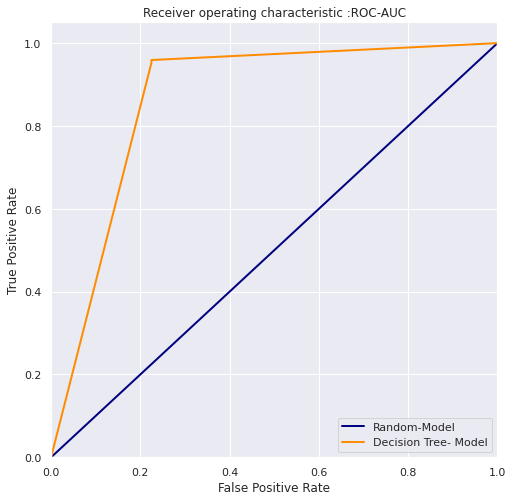

Computed Area Under the Curve (AUC) 0.8664240890154511


In [ ]:
from sklearn.metrics import roc_curve,auc
fpr,tpr, thresholds = roc_curve(Y_test,dt_model.predict_proba(X_test)[:,1])
plt.figure(figsize=(8,8))
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.plot([0,1],[0,1],color="navy",lw=2,label="Random-Model")
plt.plot(fpr,tpr,color="darkorange",lw=2, label="Decision Tree- Model")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operating characteristic :ROC-AUC")
plt.legend()
plt.show()
print("Computed Area Under the Curve (AUC)",auc(fpr, tpr))